# Análise exploratória dos ativos de uma carteira de fundos de investimentos fictícios

## Contexto

Supondo uma empresa atacadista (Cedente) realizando transações de títulos dos fundos com os seus clientes (Sacado), de modo que os títulos têm: valor, taxa de juros mensal, taxa de desagio, uma data de vencimento e uma data de pagamento.

Apresentamos uma análise descritiva dos ativos, demonstrando a situação da carteira atual (Regionalização, concentrações de clientes, taxas de pagamento, Receitas, entre outros).

Na implementação da análise utilizamos a linguagem Python, com o aparato das bibliotecas: Pandas, Numpy, Matplotlib e Seaborn.



A Base de dados possui valores fictícios, de modo que têm as colunas abaixo:

| Nome variável | Descrição da variável |
| ------ | ------ |
| CODIGO | Código do título |
| NOME_FUNDO | Nome do fundo em que o título está registrado|
| TIPO_PRODUTO | Tipo de produto do título |
| CEDENTE | Nome do Cedente |
| SACADO | Nome do sacado |
| LIMITE_CEDENTE | Limite de Crédito do Cedente |
| ESTADO_CEDENTE | Estado de cadastro do Cedente |
| ESTADO_SACADO | Estado de cadastro do sacado |
| VENCIMENTO | Data de vencimento do título |
| DATA_EMISSAO | Data de emissão do título |
| DATA_PAGAMENTO | Data de vencimento de pagamento do título |
| VALOR_REAL | Valor do título |
| VALOR_DESAGIO | valor de deságio do título |
| TAXA_MENSAL | Taxa mensal (30 dias) que foi utilizada para o desconto do título |
| STATUS_LIQ_TITULO | Status de liquidação do título (EM_DIA: O Título foi pago em dia, ATRASO o título foi pago em atraso) |

# Implementação

Vamos iniciar a nossa análise!

# Coleta e Exploração Inicial dos Dados

## Imports básicos


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns

%matplotlib inline

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

## Coleta de Dados


In [2]:
df_titulos = pd.read_csv("BASE_TITULOS.txt", sep="\t")
df_titulos.head()

,CODIGO,NOME_FUNDO,TIPO_PRODUTO,CEDENTE,SACADO,LIMITE_CEDENTE,ESTADO_CEDENTE,ESTADO_SACADO,VENCIMENTO,DATA_EMISSAO,...,RISCO_13,RISCO_14,RISCO_15,RISCO_16,RISCO_17,RISCO_18,RISCO_19,RISCO_20,RISCO_21,STATUS_LIQ_TITULO
0,1,Fundo 1,Produto 1,Cedente 2,Sacado 249,10000000,CE,SP,2018-03-18,2017-10-28,...,0.168124,0,0.066667,0.2,0.727965,0.738669,0.407407,0.860111,0.985155,EM_DIA
1,2,Fundo 2,Produto 1,Cedente 1,Sacado 1372,8035714,PA,MG,2018-06-24,2018-05-21,...,0.392065,0,0.266667,0.6,0.010041,0.012547,0.395062,0.698438,0.707374,EM_DIA
2,3,Fundo 1,Produto 1,Cedente 2,Sacado 346,10000000,CE,PR,2018-03-19,2017-11-29,...,0.109617,0,0.066667,0.2,0.327489,0.321123,0.395062,0.890059,0.987560,ATRASO
3,4,Fundo 2,Produto 1,Cedente 1,Sacado 585,8035714,PA,PA,2018-04-03,2018-02-14,...,0.415602,0,0.400000,0.6,0.012217,0.017485,0.419753,0.609827,0.906279,ATRASO
4,5,Fundo 1,Produto 1,Cedente 2,Sacado 2184,10000000,CE,RJ,2018-02-02,2017-11-03,...,0.168124,0,0.066667,0.2,0.727965,0.738669,0.407407,0.860111,0.368493,EM_DIA


### Tamanho do DataFrame

In [3]:
print(f"Dimensões do DataFrame: {df_titulos.shape}")

Dimensões do DataFrame: (9415, 36)


### Tipos de Dados

In [4]:
display(df_titulos.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9415 entries, 0 to 9414
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CODIGO             9415 non-null   int64  
 1   NOME_FUNDO         9415 non-null   object 
 2   TIPO_PRODUTO       9415 non-null   object 
 3   CEDENTE            9415 non-null   object 
 4   SACADO             9415 non-null   object 
 5   LIMITE_CEDENTE     9415 non-null   int64  
 6   ESTADO_CEDENTE     9415 non-null   object 
 7   ESTADO_SACADO      9173 non-null   object 
 8   VENCIMENTO         9415 non-null   object 
 9   DATA_EMISSAO       9415 non-null   object 
 10  DATA_PAGAMENTO     9415 non-null   object 
 11  VALOR_REAL         9415 non-null   float64
 12  VALOR_DESAGIO      9415 non-null   float64
 13  TAXA_MENSAL        9413 non-null   float64
 14  RISCO_1            9415 non-null   float64
 15  RISCO_2            9415 non-null   float64
 16  RISCO_3            9415 

None

### Detalhes estatisticos do DataFrame

In [5]:
display(df_titulos[['LIMITE_CEDENTE',	'VALOR_REAL',	'VALOR_DESAGIO', 'TAXA_MENSAL']].describe())

,LIMITE_CEDENTE,VALOR_REAL,VALOR_DESAGIO,TAXA_MENSAL
count,9.415000e+03,9.415000e+03,9415.000000,9413.000000
mean,5.753972e+06,6.434006e+03,485.709868,0.046295
std,3.259539e+06,4.192773e+04,3363.835163,0.050580
min,0.000000e+00,1.724000e+01,0.174568,-0.532319
25%,2.500000e+06,4.809900e+02,31.902240,0.023639
50%,6.964286e+06,9.782300e+02,77.306935,0.034636
75%,8.035714e+06,2.868530e+03,205.160470,0.054734
max,1.000000e+07,3.112000e+06,163116.717700,2.320652


### Verificando a existência de linhas duplicadas

In [6]:
print(f"Soma dos registros duplicados do dataset")
display(df_titulos.duplicated().sum())
print("\n")

Soma dos registros duplicados do dataset


0

### Verificando a existência de linhas com valores nulos

In [7]:
print(df_titulos.isnull().sum() / len(df_titulos))

CODIGO               0.000000
NOME_FUNDO           0.000000
TIPO_PRODUTO         0.000000
CEDENTE              0.000000
SACADO               0.000000
LIMITE_CEDENTE       0.000000
ESTADO_CEDENTE       0.000000
ESTADO_SACADO        0.025704
VENCIMENTO           0.000000
DATA_EMISSAO         0.000000
DATA_PAGAMENTO       0.000000
VALOR_REAL           0.000000
VALOR_DESAGIO        0.000000
TAXA_MENSAL          0.000212
RISCO_1              0.000000
RISCO_2              0.000000
RISCO_3              0.000000
RISCO_4              0.727244
RISCO_5              0.000000
RISCO_6              0.823579
RISCO_7              0.000000
RISCO_8              0.000000
RISCO_9              0.000000
RISCO_10             0.476367
RISCO_11             0.000000
RISCO_12             0.824642
RISCO_13             0.004249
RISCO_14             0.000000
RISCO_15             0.000000
RISCO_16             0.000000
RISCO_17             0.000000
RISCO_18             0.000000
RISCO_19             0.014551
RISCO_20  

### Período de datas do DataFrame

Ajustando variaveis de data para datatime

In [8]:
df_titulos.DATA_EMISSAO = pd.to_datetime(df_titulos.DATA_EMISSAO, format='%Y-%m-%d',
                                     errors='coerce')
df_titulos.DATA_PAGAMENTO = pd.to_datetime(df_titulos.DATA_PAGAMENTO, format='%Y-%m-%d',
                                     errors='coerce')
df_titulos.VENCIMENTO = pd.to_datetime(df_titulos.VENCIMENTO, format='%Y-%m-%d',
                                     errors='coerce')

In [9]:
data_emissao_min = df_titulos.DATA_EMISSAO.min().strftime("%d/%m/%Y")
data_emissao_max = df_titulos.DATA_EMISSAO.max().strftime("%d/%m/%Y")
data_pagamento_min = df_titulos.DATA_PAGAMENTO.min().strftime("%d/%m/%Y")
data_pagamento_max = df_titulos.DATA_PAGAMENTO.max().strftime("%d/%m/%Y")
print(f"Período Data Emissão: Entre {data_emissao_min} e {data_emissao_max}")
print(f"Período Data Pagamento: Entre {data_pagamento_min} e {data_pagamento_max}")


Período Data Emissão: Entre 02/05/2016 e 27/09/2018
Período Data Pagamento: Entre 24/11/2017 e 16/06/2021


# Análise Descritiva dos Ativos

A partir de algumas perguntas, podemos entender e analisar a situação da carteira.

### Qual o fundo mais vendido? e o menos?

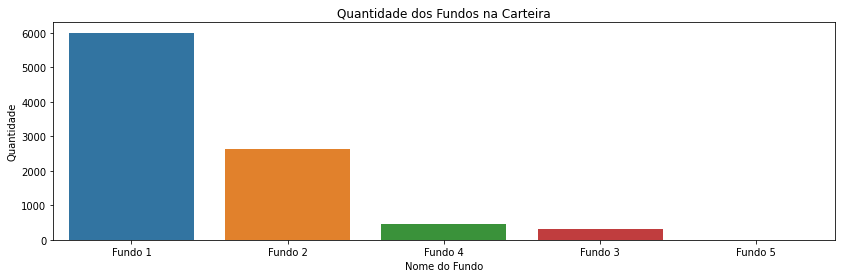

In [13]:
# plotando gráfico
plt.figure(figsize=(14,4))
sns.countplot(x=df_titulos.NOME_FUNDO)
plt.title('Quantidade dos Fundos na Carteira')
plt.xlabel("Nome do Fundo")
plt.ylabel("Quantidade")
plt.show()

O Fundo 1 é o mais vendido, de modo que o menos vendido é o Fundo 5.

### Como está a distribuição do status de liquidação dos fundos?

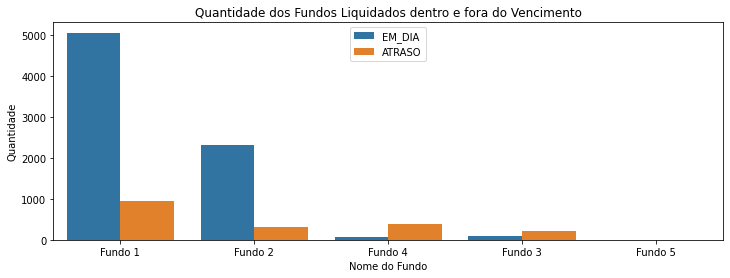

In [17]:
plt.figure(figsize=(12,4))
sns.countplot(df_titulos['NOME_FUNDO'], hue=df_titulos.STATUS_LIQ_TITULO)

plt.title('Quantidade dos Fundos Liquidados dentro e fora do Vencimento')
plt.xlabel("Nome do Fundo")
plt.legend()
plt.ylabel("Quantidade")
plt.show()

O Fundo com mais liquidações em dia é o Fundo 1. O Fundo 4 tem maior quantidade de pagamentos em atraso.

### Qual o produto mais vendido? e o menos?

In [18]:
df_titulos.groupby('TIPO_PRODUTO')['TIPO_PRODUTO'].agg(['count']).sort_values(by='count', ascending=False)

,count
TIPO_PRODUTO,
Produto 1,7867
Produto 5,1109
Produto 3,245
Produto 2,190
Produto 4,4


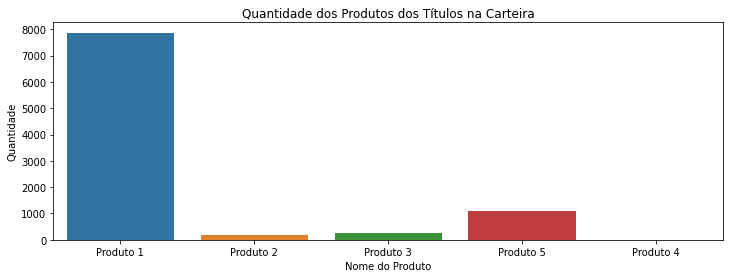

In [19]:
plt.figure(figsize=(12,4))
sns.countplot(x=df_titulos.TIPO_PRODUTO)
plt.title('Quantidade dos Produtos dos Títulos na Carteira')
plt.xlabel("Nome do Produto")
plt.ylabel("Quantidade")
plt.show()

Vemos que o produto mais vendido é o Produto 1 e o menos vendido é o Produto 4.

### Como está a Distribuição dos Prodututos em cada fundo? Quantos foram pagos em dia?

In [20]:
display(df_titulos.groupby(['NOME_FUNDO', 'TIPO_PRODUTO'])['VALOR_REAL'].agg(['count']))

count
NOME_FUNDO TIPO_PRODUTO       
Fundo 1    Produto 1      5858
           Produto 2       147
Fundo 2    Produto 1      1839
           Produto 2        34
           Produto 3       243
           Produto 5       512
Fundo 3    Produto 1        98
           Produto 5       208
Fundo 4    Produto 1        72
           Produto 2         9
           Produto 3         2
           Produto 5       389
Fundo 5    Produto 4         4

Acima temos as quantidades dos Produtos atrelados a cada Fundo.

C:\Users\PICHAU\AppData\Local\Temp/ipykernel_2932/29366.py:56: MatplotlibDeprecationWarning: Support for passing numbers through unit converters is deprecated since 3.5 and support will be removed two minor releases later; use Axis.convert_units instead.
  plt.hist(df_titulos.loc[(df_titulos.NOME_FUNDO == 'Fundo 5') &


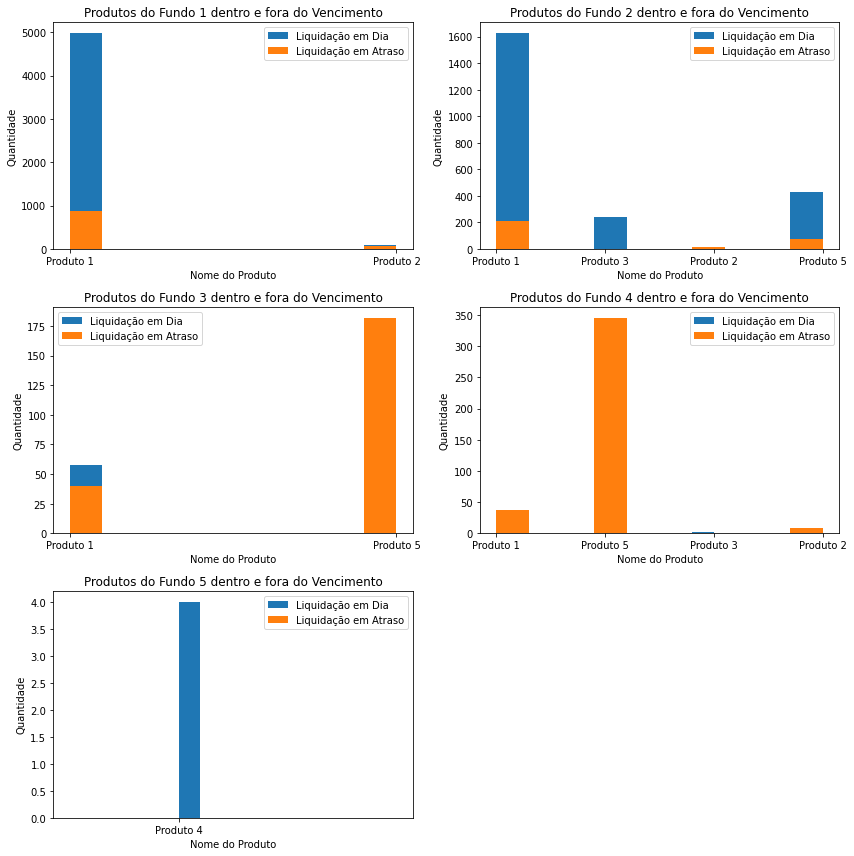

In [21]:
fig = plt.figure(figsize=(12,12))

plt.subplot(3, 2, 1)
plt.title('Produtos do Fundo 1 dentro e fora do Vencimento')
plt.hist(df_titulos.loc[(df_titulos.NOME_FUNDO == 'Fundo 1') & 
                        (df_titulos.STATUS_LIQ_TITULO == 'EM_DIA')]['TIPO_PRODUTO'], 
         label='Liquidação em Dia')
plt.hist(df_titulos.loc[(df_titulos.NOME_FUNDO == 'Fundo 1') & 
                        (df_titulos.STATUS_LIQ_TITULO == 'ATRASO')]['TIPO_PRODUTO'], 
         label='Liquidação em Atraso')
plt.xlabel("Nome do Produto")
plt.legend()
plt.ylabel("Quantidade")

plt.subplot(3, 2, 2)
plt.title('Produtos do Fundo 2 dentro e fora do Vencimento')
plt.hist(df_titulos.loc[(df_titulos.NOME_FUNDO == 'Fundo 2') & 
                        (df_titulos.STATUS_LIQ_TITULO == 'EM_DIA')]['TIPO_PRODUTO'], 
         label='Liquidação em Dia')
plt.hist(df_titulos.loc[(df_titulos.NOME_FUNDO == 'Fundo 2') & 
                        (df_titulos.STATUS_LIQ_TITULO == 'ATRASO')]['TIPO_PRODUTO'], 
         label='Liquidação em Atraso')
plt.xlabel("Nome do Produto")
plt.legend()
plt.ylabel("Quantidade")

plt.subplot(3, 2, 3)
plt.title('Produtos do Fundo 3 dentro e fora do Vencimento')
plt.hist(df_titulos.loc[(df_titulos.NOME_FUNDO == 'Fundo 3') & 
                        (df_titulos.STATUS_LIQ_TITULO == 'EM_DIA')]['TIPO_PRODUTO'], 
         label='Liquidação em Dia')
plt.hist(df_titulos.loc[(df_titulos.NOME_FUNDO == 'Fundo 3') & 
                        (df_titulos.STATUS_LIQ_TITULO == 'ATRASO')]['TIPO_PRODUTO'], 
         label='Liquidação em Atraso')
plt.xlabel("Nome do Produto")
plt.legend()
plt.ylabel("Quantidade")

plt.subplot(3, 2, 4)
plt.title('Produtos do Fundo 4 dentro e fora do Vencimento')
plt.hist(df_titulos.loc[(df_titulos.NOME_FUNDO == 'Fundo 4') & 
                        (df_titulos.STATUS_LIQ_TITULO == 'EM_DIA')]['TIPO_PRODUTO'], 
         label='Liquidação em Dia')
plt.hist(df_titulos.loc[(df_titulos.NOME_FUNDO == 'Fundo 4') & 
                        (df_titulos.STATUS_LIQ_TITULO == 'ATRASO')]['TIPO_PRODUTO'], 
         label='Liquidação em Atraso')
plt.xlabel("Nome do Produto")
plt.legend()
plt.ylabel("Quantidade")

plt.subplot(3, 2, 5)
plt.title('Produtos do Fundo 5 dentro e fora do Vencimento')
plt.hist(df_titulos.loc[(df_titulos.NOME_FUNDO == 'Fundo 5') & 
                        (df_titulos.STATUS_LIQ_TITULO == 'EM_DIA')]['TIPO_PRODUTO'], 
         label='Liquidação em Dia')
plt.hist(df_titulos.loc[(df_titulos.NOME_FUNDO == 'Fundo 5') & 
                        (df_titulos.STATUS_LIQ_TITULO == 'ATRASO')]['TIPO_PRODUTO'], 
         label='Liquidação em Atraso')
plt.xlabel("Nome do Produto")
plt.legend()
plt.ylabel("Quantidade")
plt.tight_layout()
plt.show()

Este gráfico acima mostra o status de liquidação dos Produtos de cada Fundo. A maioria dos produtos do Fundo 4 teve atraso na liquidação. O Fundo 5 teve todos os produtos pagos em dia.

### Qual o Valor Médio dos Fundos?

In [22]:
df_titulos.groupby('STATUS_LIQ_TITULO')['VALOR_REAL'].agg(['mean'])

,mean
STATUS_LIQ_TITULO,
ATRASO,5110.512726
EM_DIA,6761.372532


Na média, os títulos liquidados em Dia tem maior valor real, com aproximadamente R\$ 6.761,37 

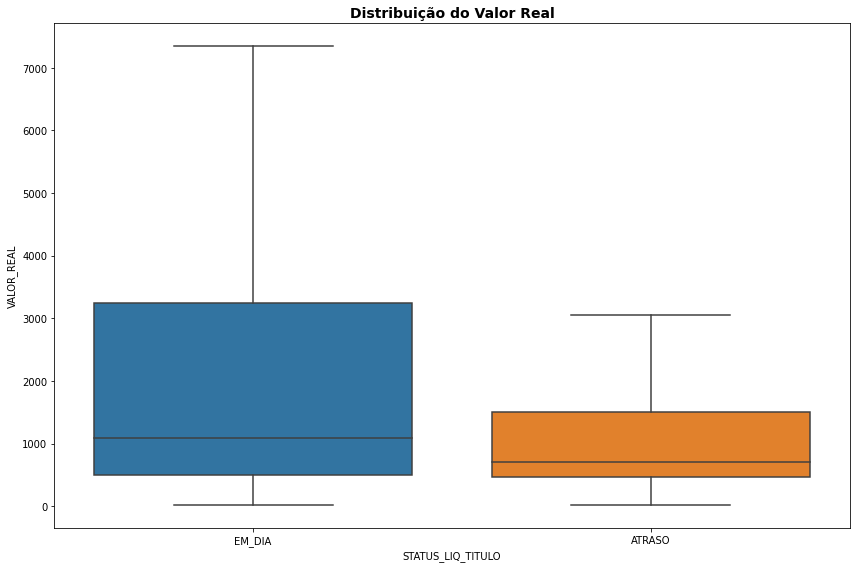

In [23]:
plt.figure(figsize=(12,8))
sns.boxplot(x='STATUS_LIQ_TITULO', y='VALOR_REAL', data=df_titulos,  
            showfliers=False)

plt.title('Distribuição do Valor Real',fontsize=14,weight='bold')
plt.tight_layout()
plt.show()

Este gráfico de boxplot mostra a distribuição do Valor dos títulos sem considerar as medidas discrepantes, o que chamamos de outliers.

A linha no centro de cada caixa indica a mediana do Valor Real.

As caudas de cima e de baixo são os maiores e menores valores respectivamente. Para os títulos em dia, vemos que eles são bem distantes, isso indica uma maior variação dos dados.

Os títulos em atraso tem valores menores e estes valores não variam muito.



### Qual o valor De Desagio Médio dos Fundos?

In [24]:
df_titulos.groupby('STATUS_LIQ_TITULO')['VALOR_DESAGIO'].agg(['mean'])

,mean
STATUS_LIQ_TITULO,
ATRASO,467.540467
EM_DIA,490.204074


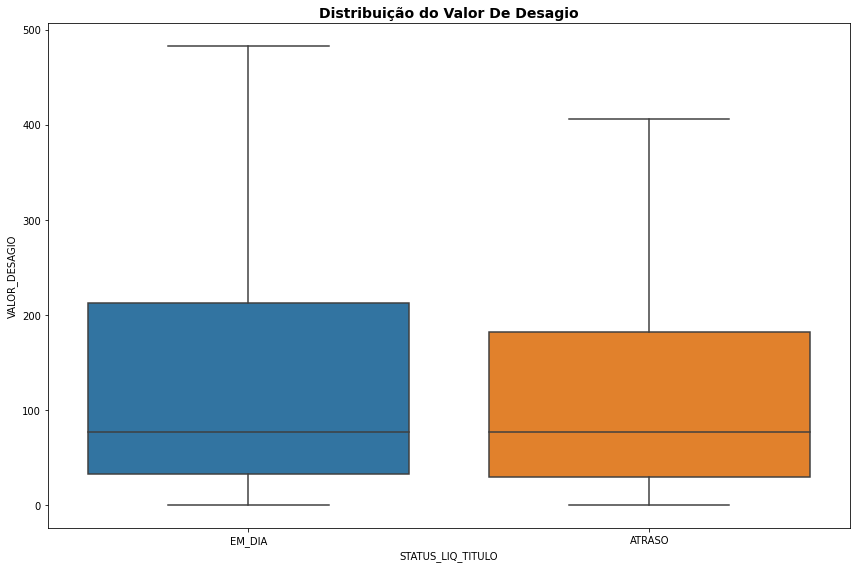

In [25]:
plt.figure(figsize=(12,8))
sns.boxplot(x='STATUS_LIQ_TITULO', y='VALOR_DESAGIO', data=df_titulos,  
            showfliers=False)
plt.title('Distribuição do Valor De Desagio',fontsize=14,weight='bold')
plt.tight_layout()
plt.show()

Novamente um gráfico de boxplot com a distribuição do valor de desagio. Vemos que a mediana em ambos os casos é bem próxima, tanto para liquidados em dia como em atraso. 

### Como os Títulos estão distribuídos por estado?

In [26]:
df_titulos.groupby('ESTADO_CEDENTE')['CODIGO'].agg(['count']).sort_values(by='count', ascending=False )

,count
ESTADO_CEDENTE,
CE,3307
SP,2904
RS,1125
GO,609
MG,567
RJ,305
PA,214
SC,182
BA,172


O estado do Ceará apresentou mais títulos com clientes cedentes cadastrados no estado. O estado com menos clientes cedentes foi o estado do Sergipe.

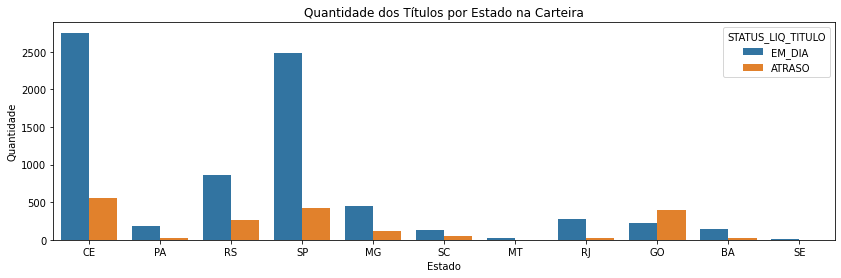

In [27]:
plt.figure(figsize=(14,4))
sns.countplot(x=df_titulos.ESTADO_CEDENTE, hue=df_titulos.STATUS_LIQ_TITULO)
plt.title('Quantidade dos Títulos por Estado na Carteira')
plt.xlabel("Estado")
plt.ylabel("Quantidade")
plt.show()

O único estado que teve mais clientes cerdentes com títulos em atraso do que pagos em dia foi o estado de Goiás.

### Como as operações estão distribuídas nas regiões do Brasil?

Vamos adicionar uma coluna com a região do estado Sacado


In [28]:
# dicionário com as regiões de cada estado do Brasil
# chave=estado; valor=Regiao

dic_regiao_estado = {
        'SP' : 'SUDESTE',
        'MG' : 'SUDESTE',
        'RJ' : 'SUDESTE',
        'BA' : 'NORDESTE',
        'RS' : 'SUL',
        'PR' : 'SUL',
        'PE' : 'NORDESTE',
        'CE' : 'NORDESTE',
        'PA' : 'NORTE',
        'MA' : 'NORDESTE',
        'SC' : 'SUL',
        'GO' : 'CENTRO-OESTE',
        'PB' : 'NORDESTE',
        'ES' : 'SUDESTE',
        'AM' : 'NORTE',
        'RN' : 'NORDESTE',
        'AL' : 'NORDESTE',
        'PI' : 'NORDESTE',
        'MT' : 'CENTRO-OESTE',
        'DF' : 'CENTRO-OESTE',
        'MS' : 'CENTRO-OESTE',
        'SE' : 'NORDESTE',
        'RO' : 'NORTE',
        'TO' : 'NORTE',
        'AC' : 'NORTE',
        'AP' : 'NORTE',
        'RR' : 'NORTE'
        }

In [29]:
# lista para inserir coluna de regioes
regioes_cedentes = []

# populando a lista de regiao para cada linha do dataframe
for estado_cedente in df_titulos.ESTADO_CEDENTE.iteritems():
  estado = (estado_cedente[1])
  regioes_cedentes.append(dic_regiao_estado[estado])
  
# adicionando a coluna de região do estado cedente
df_titulos['REGIAO_CEDENTE'] = regioes_cedentes

In [30]:
# testando coluna de região
display(df_titulos[df_titulos.ESTADO_CEDENTE == 'MT']['REGIAO_CEDENTE'].head())

506    CENTRO-OESTE
507    CENTRO-OESTE
510    CENTRO-OESTE
511    CENTRO-OESTE
513    CENTRO-OESTE
Name: REGIAO_CEDENTE, dtype: object

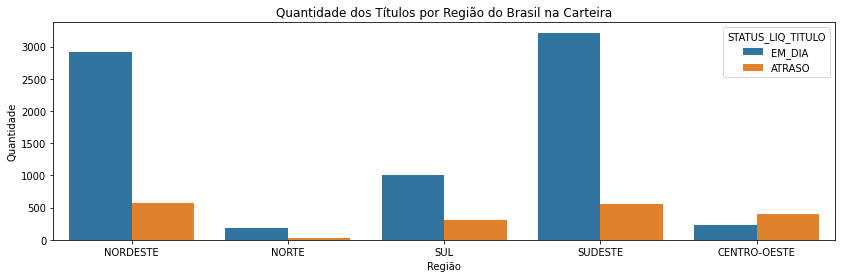

In [31]:
plt.figure(figsize=(14,4))
sns.countplot(x=df_titulos.REGIAO_CEDENTE, hue=df_titulos.STATUS_LIQ_TITULO)
plt.title('Quantidade dos Títulos por Região do Brasil na Carteira')
plt.xlabel("Região")
plt.ylabel("Quantidade")
plt.show()

Conforme observamos no gráfico de atrasos por estado, vemos que a região centro-oeste teve mais títulos atrasados do que pagos em dia.

### Quais fundos foram operados por região?

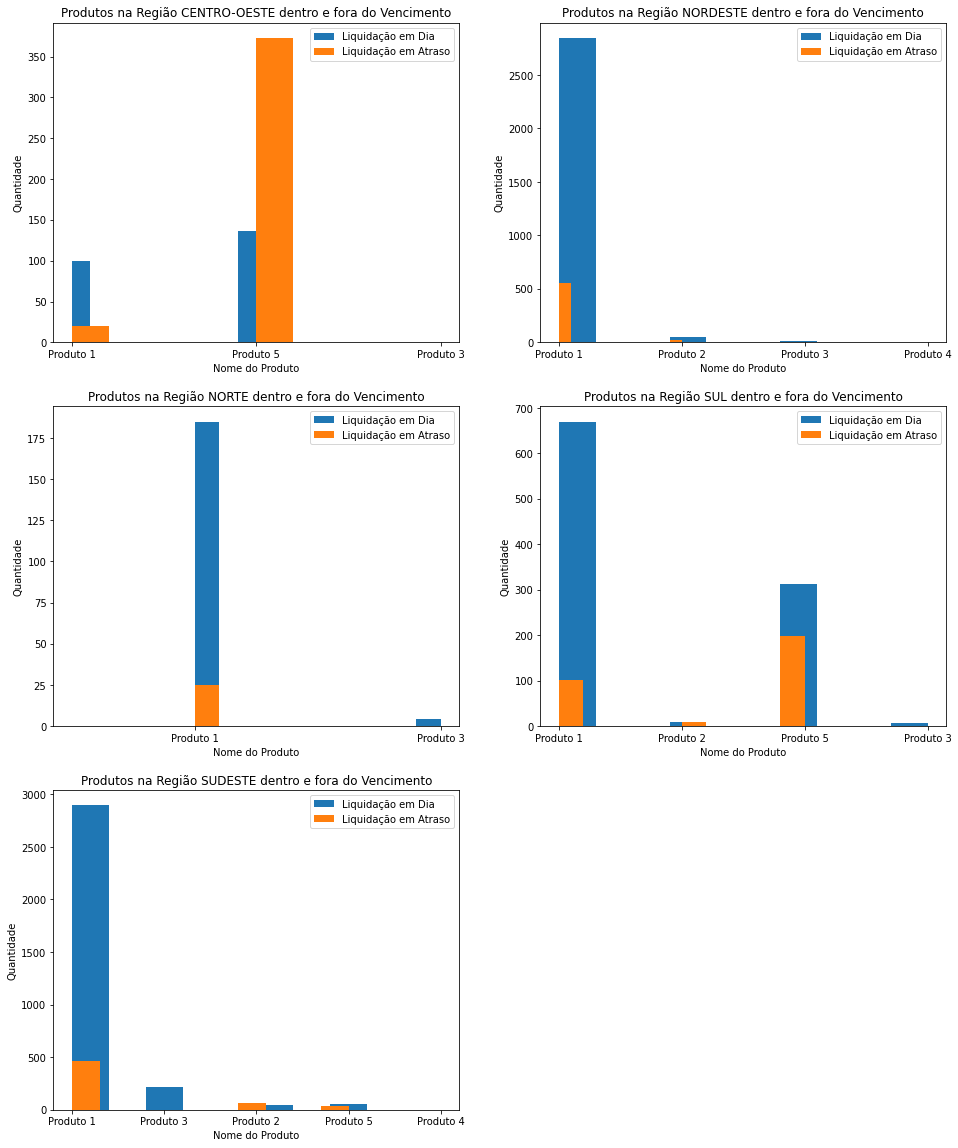

In [32]:
lista_regioes = list(set(df_titulos.REGIAO_CEDENTE))

fig = plt.figure(figsize=(16,20))

for regiao in lista_regioes:
  id_grafico = lista_regioes.index(regiao) + 1
  plt.subplot(3, 2, id_grafico)
  plt.title(f'Produtos na Região {regiao} dentro e fora do Vencimento')
  plt.hist(df_titulos.loc[(df_titulos.REGIAO_CEDENTE == regiao) & 
                          (df_titulos.STATUS_LIQ_TITULO == 'EM_DIA')]['TIPO_PRODUTO'], 
          label='Liquidação em Dia')
  plt.hist(df_titulos.loc[(df_titulos.REGIAO_CEDENTE == regiao) & 
                          (df_titulos.STATUS_LIQ_TITULO == 'ATRASO')]['TIPO_PRODUTO'], 
          label='Liquidação em Atraso')
  plt.xlabel("Nome do Produto")
  plt.legend()
  plt.ylabel("Quantidade")

plt.show()

As regiões com mais valores laranjas, de produtos pagos com atraso foram a Centro-Oeste e Sul.

### Qual o número total de clientes?

In [33]:
total_clientes = len(set(df_titulos.CEDENTE))
print(f"Quantidade Total de clientes cedentes: {total_clientes}")

Quantidade Total de clientes cedentes: 24


### Como os clientes cedentes estão concentrados na carteira?

In [34]:
# criando um dicionario com as porcentagens da concentracao dos clientes
lista_clientes = set(df_titulos.CEDENTE)
total_operacoes = len(df_titulos)
dic_conc_clientes = {}    # dicionario (chave;valor) com chave:cliente e valor:percentagem carteira
for cliente in lista_clientes:
  operacoes_cliente = df_titulos[df_titulos.CEDENTE == cliente]['CODIGO'].count()
  porcentagem_concentracao = 100 * operacoes_cliente/total_operacoes
  dic_conc_clientes[cliente] = round(porcentagem_concentracao, 2)



In [35]:
# convertendo o dicionario em dataFrame
df_concentracao_clientes = pd.DataFrame(list(dic_conc_clientes.items()), 
                                        columns=['CEDENTE', 'Percentagem_carteira'])

In [36]:
display(df_concentracao_clientes.sort_values(by='Percentagem_carteira', ascending=False))

,CEDENTE,Percentagem_carteira
6,Cedente 2,21.44
14,Cedente 1,15.94
0,Cedente 17,10.93
10,Cedente 9,10.37
7,Cedente 20,5.42
2,Cedente 3,5.20
15,Cedente 19,4.88
17,Cedente 5,4.09
11,Cedente 24,4.06
19,Cedente 22,3.25


Dentre os 24 clientes cedentes, os 4 maiores clientes representam mais da metade dos títulos.

### Qual a taxa de Pagamento?

In [37]:
total_operacoes = len(df_titulos)
operacoes_em_dia = df_titulos[df_titulos.STATUS_LIQ_TITULO == 'EM_DIA']['CODIGO'].count()
taxa_pagamento = 100 * round(operacoes_em_dia/total_operacoes, 2)
print(f"Taxa de Pagamento: {taxa_pagamento}%")

Taxa de Pagamento: 80.0%


### Qual foi a receita?

In [45]:
receita_total = df_titulos['VALOR_REAL'].sum()
print(f"Receita Total: R$ {receita_total}")

Receita Total: R$ 60576167.13


A Receita total foi de mais de R\$60,5 Mi

### Qual foi a receita em cada ano?

In [46]:
# como convertemos os campos de data para datatime, podemos extrair os valores das datas
df_titulos['ANO_EMISSAO'] = df_titulos['DATA_EMISSAO'].dt.year
df_titulos['MES_EMISSAO'] = df_titulos['DATA_EMISSAO'].dt.month

In [47]:
# criando um dataframe de receita por ano
df_receita_ano = df_titulos.groupby(['ANO_EMISSAO'])['VALOR_REAL'].agg(['sum']).reset_index()
df_receita_ano = df_receita_ano.rename(columns={'sum':'RECEITA'})
display(df_receita_ano)
print("Obs: Ano de 2016 possui apenas registros dos meses de Maio e Agosto")

,ANO_EMISSAO,RECEITA
0,2016,173503.71
1,2017,14638973.74
2,2018,45763689.68


Obs: Ano de 2016 possui apenas registros dos meses de Maio e Agosto


Vemos que houve um aumento nas receitas ao longo dos anos.

### Qual foi a receita dos últimos meses?

In [48]:
# criando um dataframe de receita por ano e mes
df_receita_mes = df_titulos.groupby(['ANO_EMISSAO', 'MES_EMISSAO'])['VALOR_REAL'].agg(['sum']).reset_index()
df_receita_mes = df_receita_mes.rename(columns={'sum':'RECEITA'})
display(df_receita_mes.tail().sort_values(by='MES_EMISSAO'))

,ANO_EMISSAO,MES_EMISSAO,RECEITA
16,2018,5,5051041.48
17,2018,6,4745248.36
18,2018,7,5073769.62
19,2018,8,3575632.79
20,2018,9,665244.31


In [49]:
# lista com as datas no formato MM-AAAA para facilitar no grafico de receita por mes
lista_data_curta = df_receita_mes[['MES_EMISSAO', 'ANO_EMISSAO']].fillna('').values.tolist()
data_curta_emissao = []

# populando a lista de data curta MM-AAAA para cada linha do dataframe
for data_curta in lista_data_curta:
  dt_curta = str(data_curta[0]) + "-" + str(data_curta[1])
  data_curta_emissao.append(dt_curta)
  
# adicionando a coluna de DATA_CURTA de emissão do estado cedente
df_receita_mes['DATA_CURTA_EMISSAO'] = data_curta_emissao
df_receita_mes.head()

,ANO_EMISSAO,MES_EMISSAO,RECEITA,DATA_CURTA_EMISSAO
0,2016,5,44444.44,5-2016
1,2016,8,129059.27,8-2016
2,2017,2,116084.40,2-2017
3,2017,4,67724.53,4-2017
4,2017,5,323227.05,5-2017


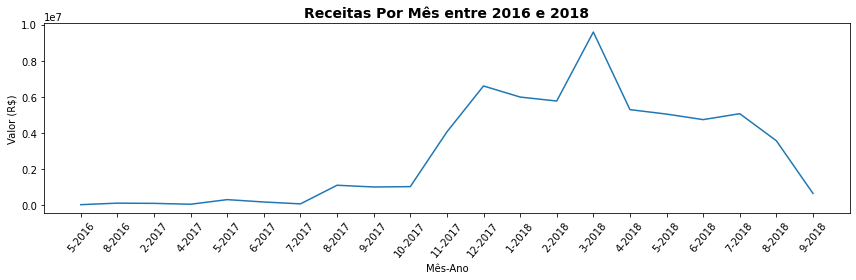

In [50]:
plt.figure(figsize=(12 ,4))

sns.lineplot(x=df_receita_mes.DATA_CURTA_EMISSAO,
             y=df_receita_mes.RECEITA)
plt.title('Receitas Por Mês entre 2016 e 2018',fontsize=14,weight='bold')
plt.xlabel("Mês-Ano")
plt.ylabel("Valor (R$)")

plt.xticks(rotation=50)
plt.tight_layout()
plt.show()

Pelo gráfico, vemos que as receitas aumentaram de maneira bem acentuada durante o ano de 2018, ao passo que o valor está em tendência de queda.

In [51]:
# removendo colunas inseridas
df_titulos = df_titulos.drop(columns=['REGIAO_CEDENTE', 'ANO_EMISSAO', 'MES_EMISSAO'])